<a href="https://colab.research.google.com/github/dorahs71/ml-course/blob/main/load_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- age     age in years      
- sex      
- bmi     body mass index      
- bp      average blood pressure      
- s1      tc, total serum cholesterol      
- s2      ldl, low-density lipoproteins      
- s3      hdl, high-density lipoproteins      
- s4      tch, total cholesterol / HDL      
- s5      ltg, possibly log of serum triglycerides level      
- s6      glu, blood sugar level

In [49]:
import pandas as pd
from sklearn.datasets import load_diabetes
raw = load_diabetes(scaled=False)

# pandas 兩種資料型態：DataFrame(2D 有行列)、Series(1D)

datas = pd.DataFrame(raw["data"], columns=raw["feature_names"]) #幫 diabetes data 加上欄位名稱 feature name

datas["ans"] = raw["target"] #幫 raw target 加上欄位名稱 ans

# bmi ，可以再延伸出體重、體脂等欄位，他可能也都跟糖尿病有關
# 平均血壓，可以再延伸出舒張壓、收縮壓等

# 資料很重要，相關領域知識很重要，資料的欄位和正確度，決定你的模型和演算法，是否貼切現實
datas

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [50]:
# pandas 操作：drop (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

# pandas 中的 axis：1 -> 直行 ; 0 -> 橫列

x = datas.drop("ans", axis = 1) # drop 是產生新的表格
y = datas["ans"] # y 是 series



In [51]:
from sklearn.model_selection import train_test_split
# Demo
# train_test_split([1,2,3,4],
#                  [5,6,7,8],
#                  test_size=0.25
# ) 隨機把資料切成 3:1，會保留住 x 對應 y 的相對位子，比如 1 對到 5, 2 對到 6...

# 90% x, 10% x, 90% y, 10% y -> 準備好切兩半資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
#偽隨機分類，大家分出來的不一樣，如果有指定 random_state ，把隨機狀態固定住，那每次區別出來的分類都一樣

In [55]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 3) #我們一定要至少設定深度，來避免過擬合問題
reg.fit(x_train, y_train) #fit 表示喂資料，要喂訓練資料，讓模型知道題目和答案之間的關係

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 's5 <= 4.64\nsquared_error = 6018.044\nsamples = 397\nvalue = 152.093'),
 Text(0.25, 0.625, 'bmi <= 26.95\nsquared_error = 3280.547\nsamples = 205\nvalue = 111.576'),
 Text(0.125, 0.375, 's5 <= 4.167\nsquared_error = 2094.955\nsamples = 158\nvalue = 96.804'),
 Text(0.0625, 0.125, 'squared_error = 1477.87\nsamples = 55\nvalue = 79.145'),
 Text(0.1875, 0.125, 'squared_error = 2169.053\nsamples = 103\nvalue = 106.233'),
 Text(0.375, 0.375, 's5 <= 4.143\nsquared_error = 4066.647\nsamples = 47\nvalue = 161.234'),
 Text(0.3125, 0.125, 'squared_error = 2266.722\nsamples = 12\nvalue = 124.333'),
 Text(0.4375, 0.125, 'squared_error = 4056.844\nsamples = 35\nvalue = 173.886'),
 Text(0.75, 0.625, 'bmi <= 27.75\nsquared_error = 5316.552\nsamples = 192\nvalue = 195.354'),
 Text(0.625, 0.375, 'bmi <= 24.4\nsquared_error = 4110.728\nsamples = 100\nvalue = 162.95'),
 Text(0.5625, 0.125, 'squared_error = 3085.195\nsamples = 38\nvalue = 137.553'),
 Text(0.6875, 0.125, 'squared_error = 

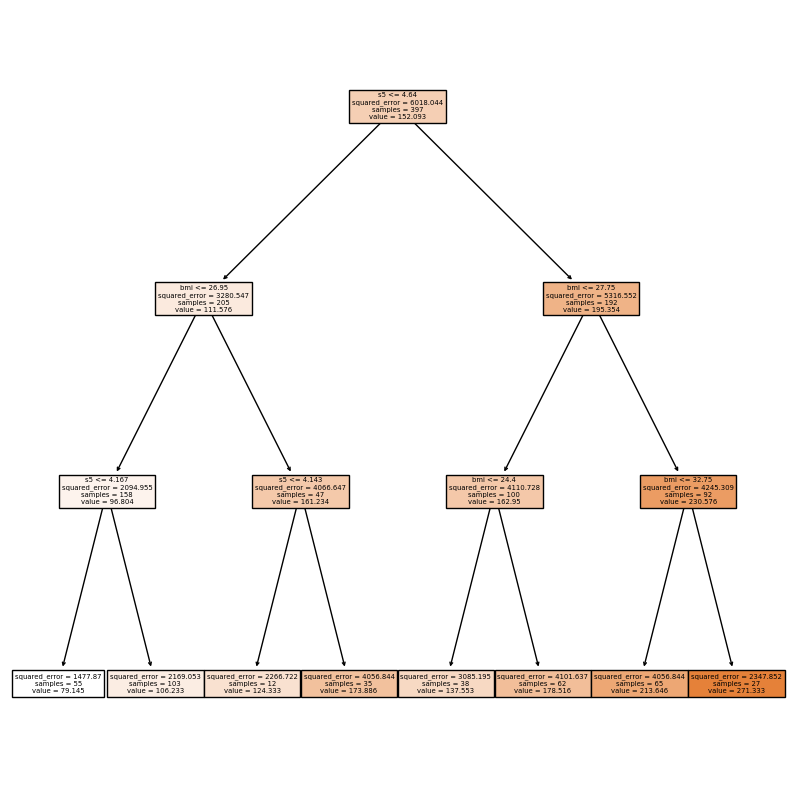

In [56]:
#matploblib: 所有繪圖基礎
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #畫出決策樹
plt.figure(figsize=[10, 10]) #圖片尺寸
plot_tree(reg, feature_names=raw["feature_names"], filled=True) #reg 是我上面回歸好的演算法

# value : 是 sample 裡的所有糖尿病指數的平均值

# 我們希望可以對取得的結果更有信心
# 如果今天結果是連續數值(糖尿病指數越高，就越容易得糖尿病)的話，要用什麼維度才可以讓我們回答的結果信心變高？
# 當分布範圍越小，我們答對的機率就越高
# 所以～信心程度 = 分布範圍


In [57]:
from sklearn.metrics import r2_score

pre = reg.predict(x_test)

r2_score(y_test, pre)
# 衡量標準出來，就是讓我們確認目前的參數，調用情況，結果不好的話，再調參數防止過擬合～max_depth

# 如果結果就是沒辦法出現 0.5 以上，方向應該是在資料裡放入更多 factors ，讓資料可以更貼近實際面貌

0.3326980178999074